In [1]:
import torch 
import torch.nn
import numpy as np
import sys,os
sys.path.append('../')

import matplotlib.pyplot as plt 
import warnings
import pandas as pd
torch.set_default_dtype(torch.float32)
warnings.filterwarnings("ignore")
from tqdm import tqdm

In [2]:
# device = torch.device('cuda:6')
# model_8192 = torch.load('../checkpoints_partial/model_atoms_8192_S_OnsagerNet_2025_09_15_10:02:42/model.pt', map_location=device)

In [3]:
# T_list = [300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]
# macro_state_predicted = {}
# deltas_predict = []
# predicted_time = {}
# dt = 1 / 2000
# initial = torch.zeros((10, 6), device=device)

# with torch.no_grad():
#     for T in tqdm(T_list):
#         T_initial = T * torch.ones((10, ), device=device) 
    
#         predicted_macro = model_8192.predict(initial, T_initial, 5000, dt=torch.tensor(dt, device=device))
#         macro_state_predicted[int(T)] = predicted_macro.cpu().numpy()  # [10, 101, 6]
#         deltas_predict.append(torch.mean(predicted_macro[:, -100:], dim=(0, 1)).cpu().numpy())

# deltas_predict = np.array(deltas_predict)  # [N, 6]
# deltas_predict.shape

In [4]:
# deltas_predict = []
# for T in T_list:
#     predicted_macro = macro_state_predicted[T]  # [10, 2001, 6]
#     deltas_predict.append(np.mean(predicted_macro[:, -1, :], axis=(0)))  # [6]
# deltas_predict = np.array(deltas_predict)  # [N, 6]
# deltas_predict.shape

In [5]:
# np.save('sro_predicted.npy', deltas_predict)

In [6]:
deltas_predict = np.load('sro_predicted.npy')
deltas_predict = deltas_predict[1:]
T_list = [400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]

# plot
dNbNb = deltas_predict[:, 0]
dNbMo = deltas_predict[:, 1]
dNbTa = deltas_predict[:, 2]
dMoMo = deltas_predict[:, 3]
dMoTa = deltas_predict[:, 4]
dTaTa = deltas_predict[:, 5]
deltas_predict.shape

(17, 6)

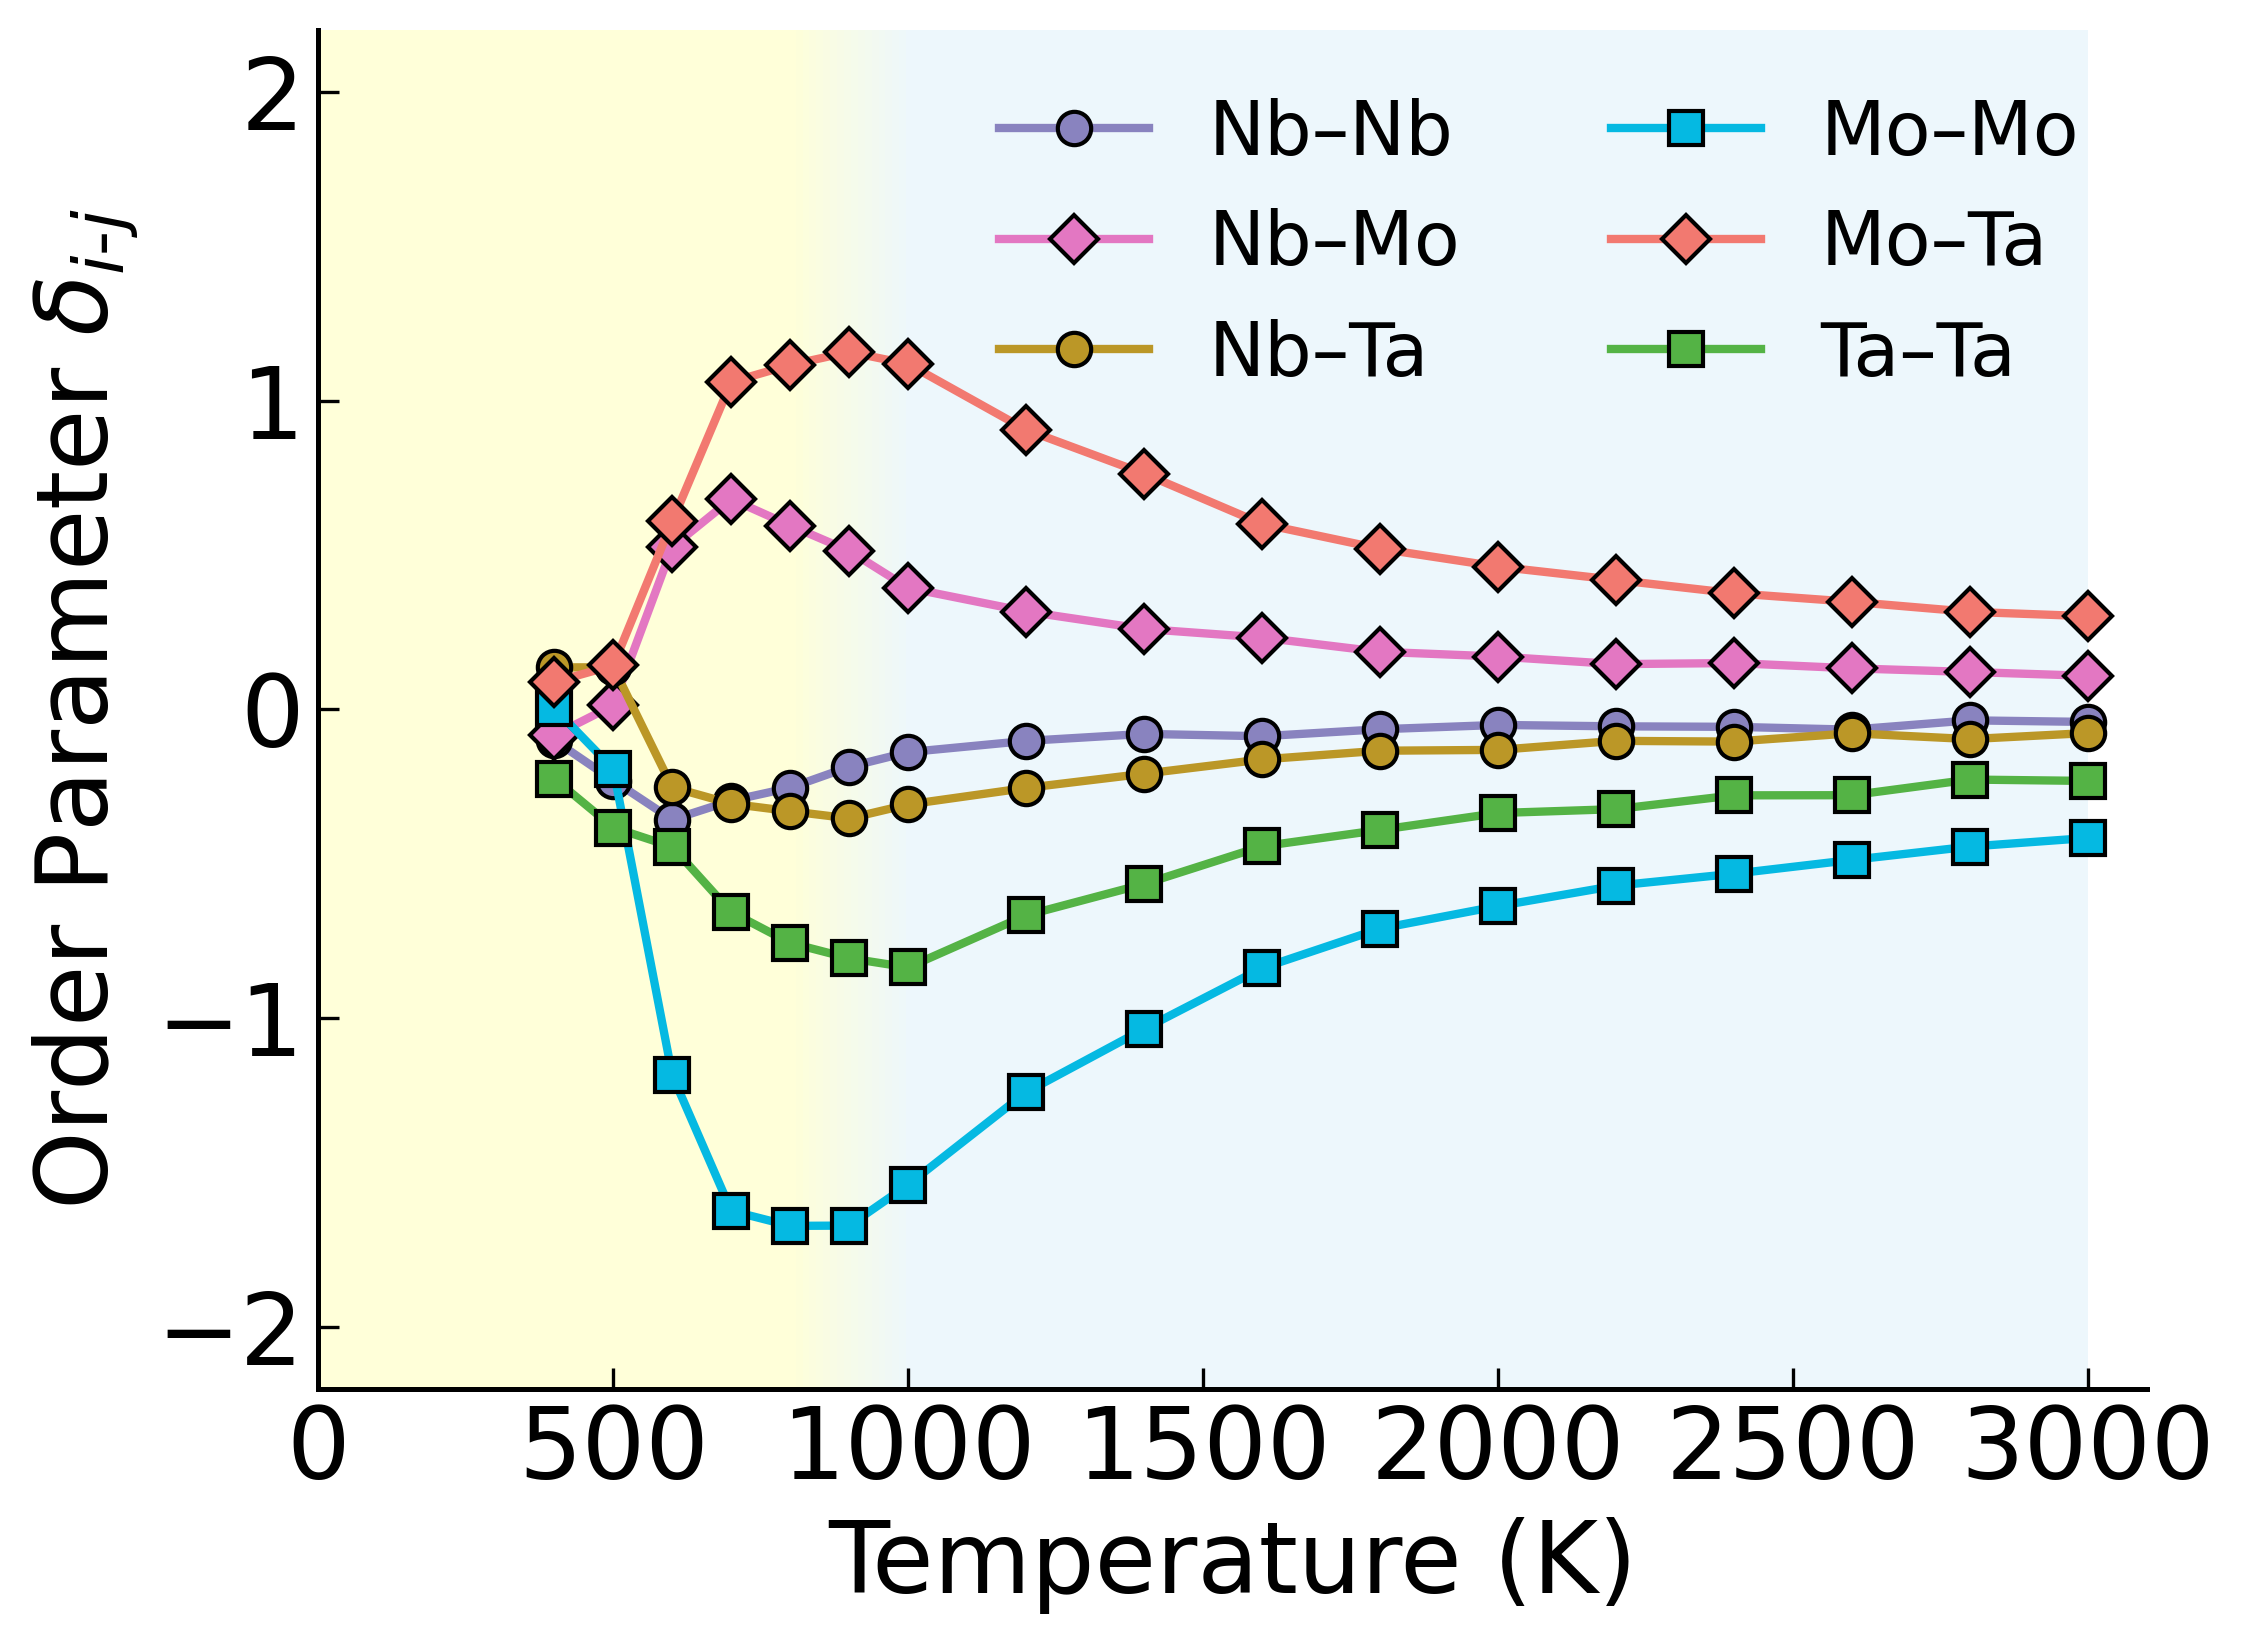

In [7]:

from matplotlib.colors import LinearSegmentedColormap
# c_list = ['tab:orange', 'tab:pink', 'tab:grey', 'tab:blue', 'tab:red', 'tab:green']
c_list = ['#8983BF', 'tab:pink', '#BB9727', '#05B9E2', '#F27970', '#54B345']
plt.rcParams.update({
    'font.size': 24,
    'font.family': 'sans-serif', 
    'text.usetex': False,  # Set to True if LaTeX is available
    'axes.linewidth': 1.2,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 2.5,
    'ytick.minor.size': 2.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'legend.frameon': False,
    'legend.fontsize': 18,
})
fig = plt.figure(figsize=(8,6), dpi=300)
axes = fig.add_subplot(1, 1, 1)
axes.plot(T_list, dNbNb, marker='o', color=c_list[0], label='Nb–Nb', linestyle='-', markersize=8, markeredgewidth=1, markeredgecolor='black', linewidth=2)
axes.plot(T_list, dNbMo, marker='D', color=c_list[1], label='Nb–Mo', linestyle='-', markersize=8, markeredgewidth=1, markeredgecolor='black', linewidth=2)
axes.plot(T_list, dNbTa, marker='o', color=c_list[2], label='Nb–Ta', linestyle='-', markersize=8, markeredgewidth=1, markeredgecolor='black', linewidth=2)
axes.plot(T_list, dMoMo, marker='s', color=c_list[3], label='Mo–Mo', linestyle='-', markersize=8, markeredgewidth=1, markeredgecolor='black', linewidth=2)
axes.plot(T_list, dMoTa, marker='D', color=c_list[4], label='Mo–Ta', linestyle='-', markersize=8, markeredgewidth=1, markeredgecolor='black', linewidth=2)
axes.plot(T_list, dTaTa, marker='s', color=c_list[5], label='Ta–Ta', linestyle='-', markersize=8, markeredgewidth=1, markeredgecolor='black', linewidth=2)


T_min, T_max = 0, 3000
Y_min, Y_max = -2.5, 2.5

# Define segmented colormap:
# (x, color) where x ∈ [0,1] is relative position in colormap
colors = [
    (0.0, "yellow"),     # 0 K → 700 K = gold
    (800/3000, "yellow"),
    (1000/3000, "skyblue"),
    (1.0, "skyblue")   # 900 K → 3100 K = skyblue
]
cmap = LinearSegmentedColormap.from_list("custom_gold_skyblue", colors)

# Gradient data
gradient = np.linspace(0, 1, 1000).reshape(1, -1)

# Draw background as a single smooth block
plt.imshow(gradient, aspect="auto", cmap=cmap,
           extent=[T_min, T_max, Y_min, Y_max],
           alpha=0.15, origin="lower")

plt.xlabel("Temperature (K)")
plt.ylabel(r"Order Parameter $\delta_{i\text{-}j}$")
axes.set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000])
plt.xlim(0,3100)
axes.set_ylim(-2.2, 2.2)
axes.legend(ncol=2, loc='upper right')
# axes.grid(ls='--', alpha=0.3)
plt.tight_layout()
plt.savefig('alloy_8192.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('alloy_8192.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

### multiple size

In [8]:
# target_T = 2000
dt = 1 / 2000

In [9]:
# model_1024 = torch.load('../checkpoints/model_atoms_1024_S_OnsagerNet_2025_09_23_08:15:56/epoch_50.pt', map_location=device)
# with torch.no_grad():
    
#     T_initial = target_T * torch.ones((100, ), device=device) 
#     predicted_macro = model_1024.predict(initial, T_initial, 2000, dt=torch.tensor(dt, device=device))
#     macro_1024 = predicted_macro.cpu().numpy()  # [10, 2001, 6]

scale_1024 = np.float64(0.0003261)
time_1024 = np.arange(0, 2000) * scale_1024 * dt


In [10]:
# initial = torch.zeros((100, 6), device=device)

# with torch.no_grad():
    
#     T_initial = target_T * torch.ones((100, ), device=device) 
#     predicted_macro = model_8192.predict(initial, T_initial, 20000, dt=torch.tensor(dt, device=device))
#     macro_8192 = predicted_macro.cpu().numpy()  # [10, 2001, 6]

scale_8192 = np.float64(4.133986162727894e-05)
time_8192 = np.arange(0, 20000) * scale_8192 * dt


In [11]:
# # 2e6 * 8 steps 
# model_65536 = torch.load('../checkpoints_partial/model_atoms_65536_S_OnsagerNet_2025_09_16_15:04:23/epoch_200.pt', map_location=device)
# with torch.no_grad():
    
#     T_initial = target_T * torch.ones((10, ), device=device) 
#     predicted_macro = model_65536.predict(initial, T_initial, 20000, dt=torch.tensor(dt, device=device))
#     macro_65536 = predicted_macro.cpu().numpy()  # [10, 2001, 6]

scale_65536 = np.float64(4.126752872762248e-05)
time_65536 = np.arange(0, 20000) * scale_65536 * dt


In [12]:
# model_524288 = torch.load('../checkpoints_partial/model_atoms_524288_S_OnsagerNet_2025_09_16_15:06:31/model.pt', map_location=device)
# with torch.no_grad():

#     T_initial = target_T * torch.ones((10, ), device=device)
#     predicted_macro = model_524288.predict(initial, T_initial, 20000, dt=torch.tensor(dt, device=device))
#     macro_524288 = predicted_macro.cpu().numpy()  # [10, 2001, 6]

scale_524288 = np.float64(4.127751068905821e-05)
time_524288 = np.arange(0, 20000) * scale_524288 * dt


In [13]:
# macro_1024.shape, macro_8192.shape, macro_65536.shape, macro_524288.shape
# mean_1024, std_1024 = np.mean(macro_1024, 0), np.std(macro_1024, 0)
# mean_8192, std_8192 = np.mean(macro_8192, 0), np.std(macro_8192, 0)
# mean_65536, std_65536 = np.mean(macro_65536, 0), np.std(macro_65536, 0)
# mean_524288, std_524288 = np.mean(macro_524288, 0), np.std(macro_524288, 0)

In [14]:
# np.savez('macro_stats.npz',
#          mean_1024=mean_1024, std_1024=std_1024,
#          mean_8192=mean_8192, std_8192=std_8192,
#          mean_65536=mean_65536, std_65536=std_65536,
#          mean_524288=mean_524288, std_524288=std_524288)

In [15]:
data = np.load('macro_stats.npz')
mean_1024 = data['mean_1024']
std_1024 = data['std_1024']
mean_8192 = data['mean_8192']
std_8192 = data['std_8192']
mean_65536 = data['mean_65536']
std_65536 = data['std_65536']
mean_524288 = data['mean_524288']
std_524288 = data['std_524288']

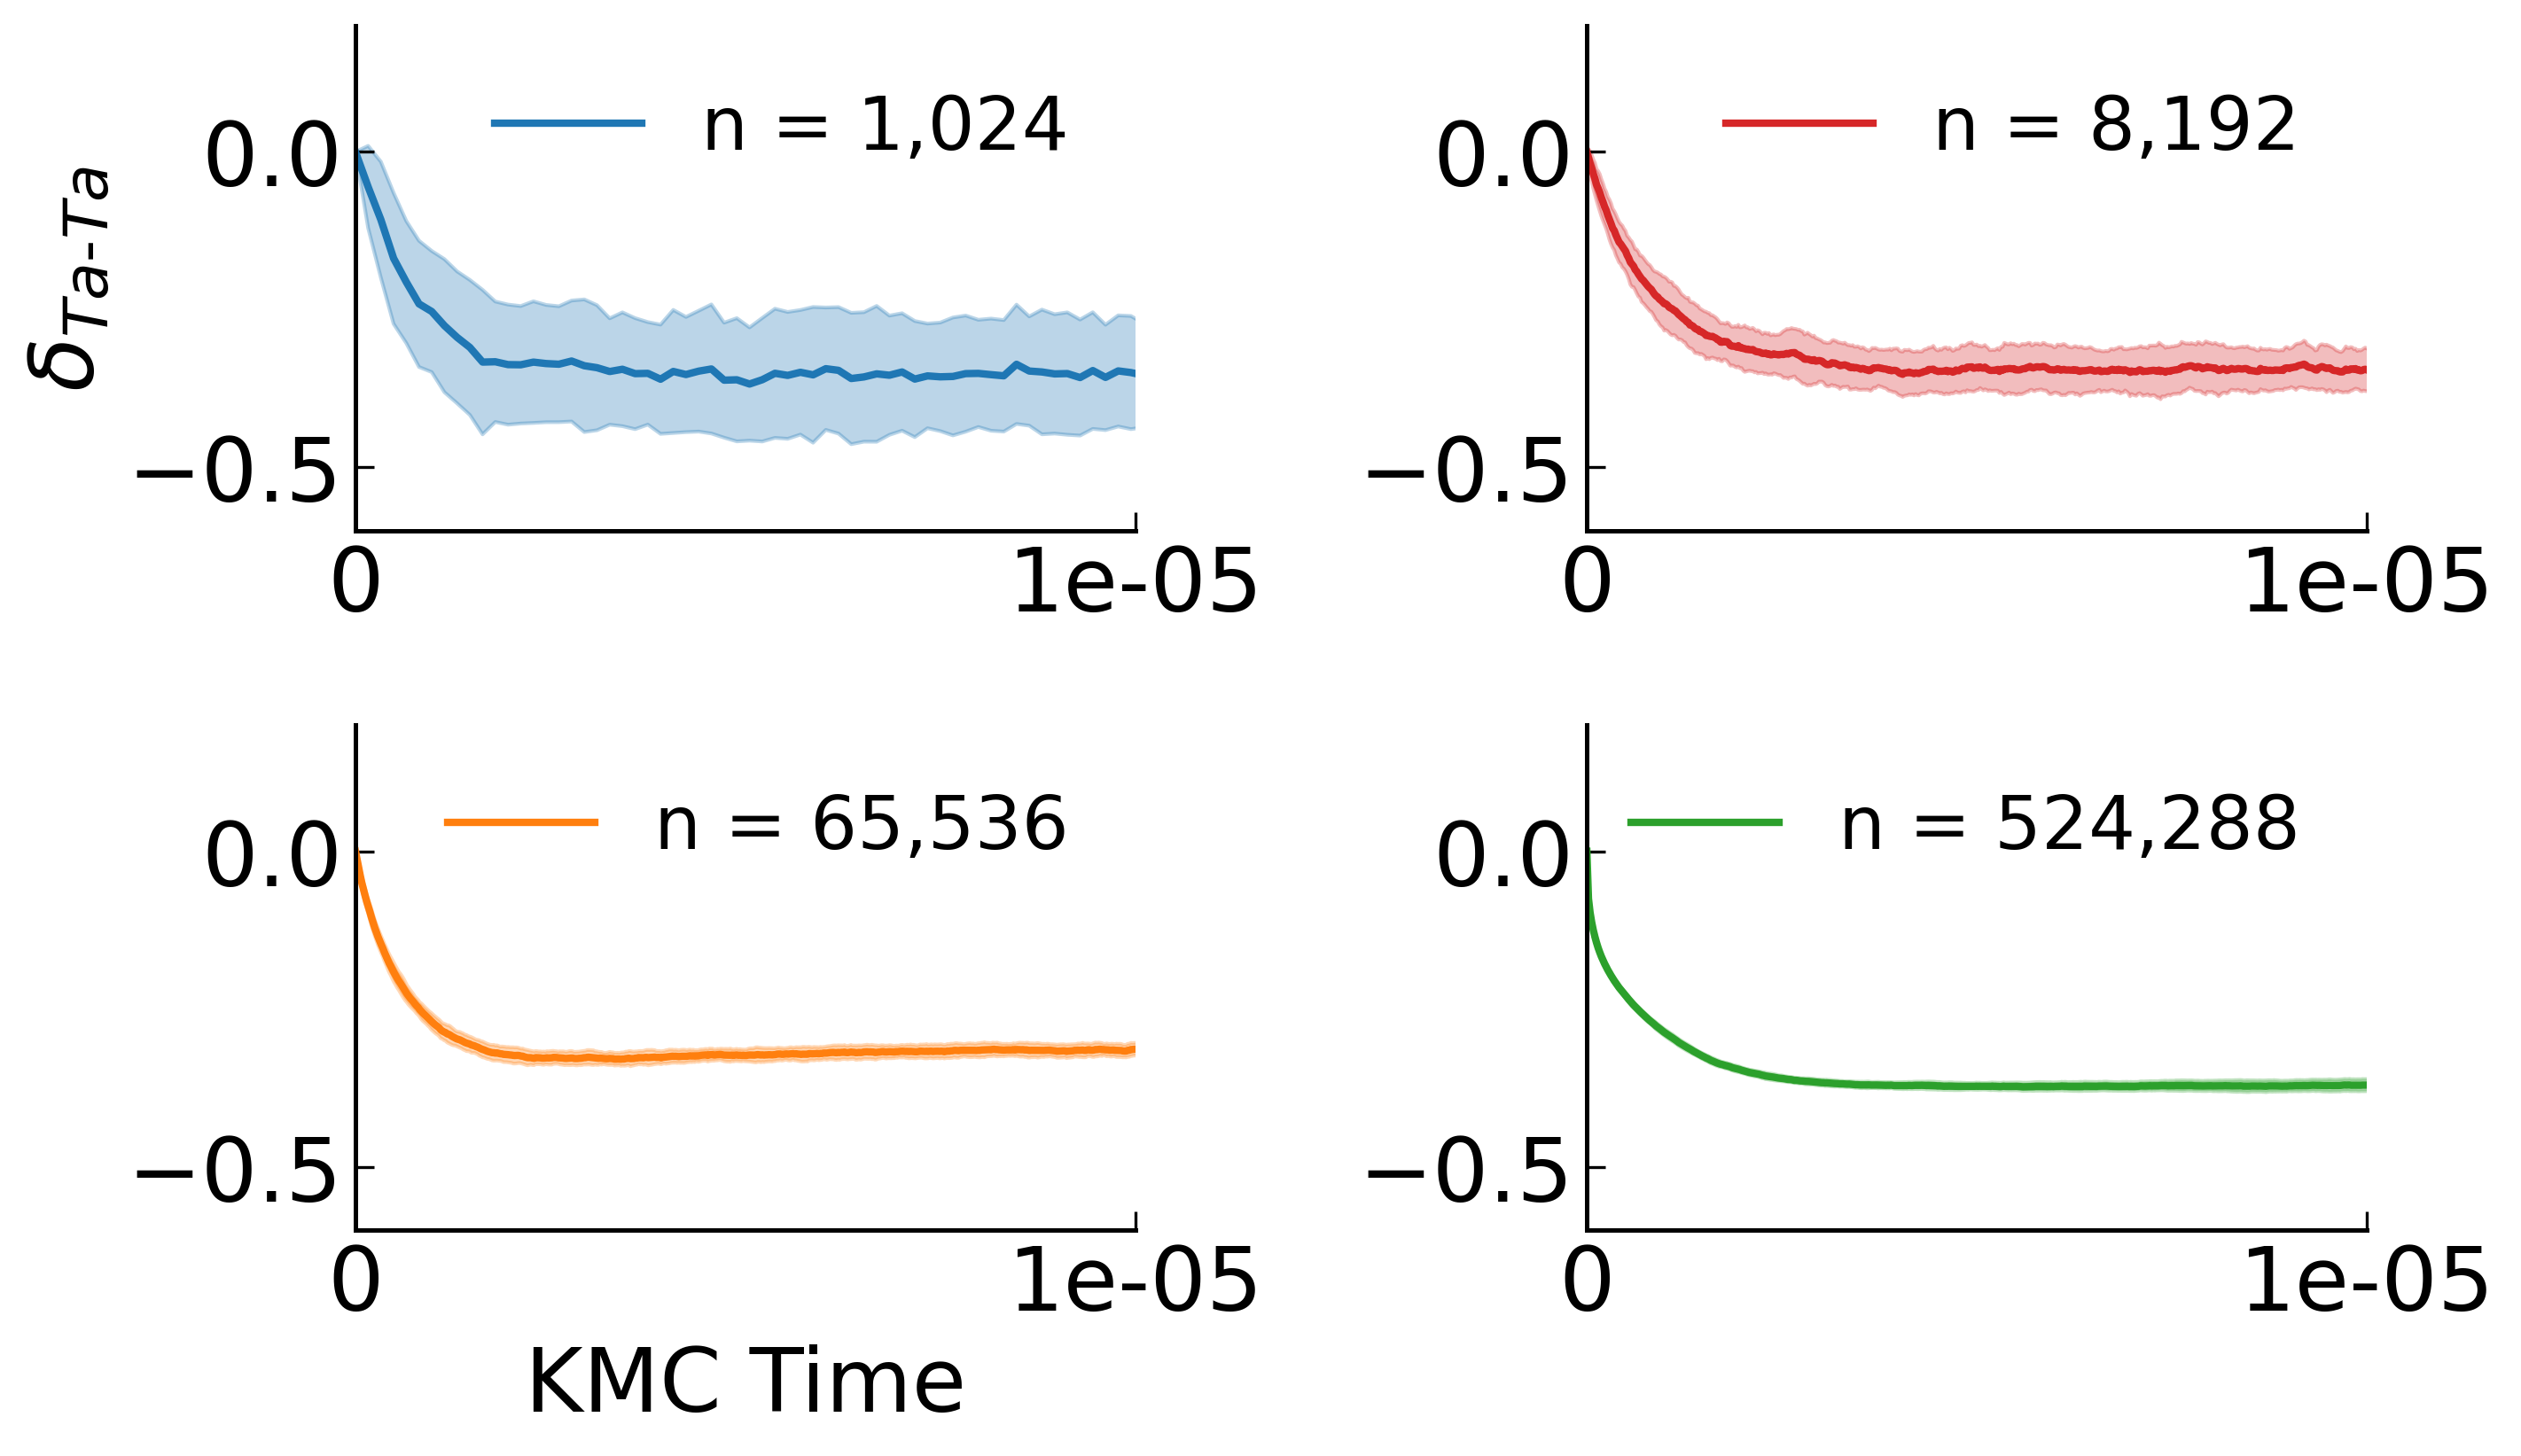

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import font
from matplotlib.ticker import FuncFormatter

c_list = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
plt.rcParams.update({
    'font.size': 24,
    'font.family': 'sans-serif', 
    'text.usetex': False,  # Set to True if LaTeX is available
    'axes.linewidth': 1.2,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 2.5,
    'ytick.minor.size': 2.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'legend.frameon': False,
    'legend.fontsize': 20,
})

idx = 5

def custom_formatter(x, pos):
    if x == 0:
        return "0"
    else:
        return f"{x:.0e}"

formatter = FuncFormatter(custom_formatter)
xticks = [0, 1e-5]

fig = plt.figure(figsize=(10, 6), dpi=300)

axes = fig.add_subplot(2, 2, 1)
axes.fill_between(time_1024, mean_1024[..., idx] - std_1024[..., idx],
                  mean_1024[..., idx] + std_1024[..., idx],
                  color=c_list[0], alpha=0.3)
axes.plot(time_1024, mean_1024[..., idx], color=c_list[0], linewidth=2, label='n = 1,024')
axes.legend(loc='upper right')
axes.set_xlim(0, 1e-5)
axes.set_ylim(-0.6, 0.2)
axes.set_xticks(xticks)
axes.xaxis.set_major_formatter(formatter)
axes.set_ylabel(r'$\delta_{Ta\text{-}Ta}$')

axes = fig.add_subplot(2, 2, 2)
axes.fill_between(time_8192, mean_8192[..., idx] - std_8192[..., idx],
                  mean_8192[..., idx] + std_8192[..., idx],
                  color=c_list[1], alpha=0.3)
axes.plot(time_8192, mean_8192[..., idx], color=c_list[1], linewidth=2, label='n = 8,192')
axes.legend(loc='upper right')
axes.set_xlim(0, 1e-5)
axes.set_ylim(-0.6, 0.2)
axes.set_xticks(xticks)
axes.xaxis.set_major_formatter(formatter)

axes = fig.add_subplot(2, 2, 3)
axes.fill_between(time_65536, mean_65536[..., idx] - std_65536[..., idx],
                  mean_65536[..., idx] + std_65536[..., idx],
                  color=c_list[2], alpha=0.3)
axes.plot(time_65536, mean_65536[..., idx], color=c_list[2], linewidth=2, label='n = 65,536')
axes.legend(loc='upper right')
axes.set_xlabel('KMC Time')
axes.set_xlim(0, 1e-5)
axes.set_ylim(-0.6, 0.2)
axes.set_xticks(xticks)
axes.xaxis.set_major_formatter(formatter)

axes = fig.add_subplot(2, 2, 4)
axes.fill_between(time_524288, mean_524288[..., idx] - std_524288[..., idx],
                  mean_524288[..., idx] + std_524288[..., idx],
                  color=c_list[3], alpha=0.3)
axes.plot(time_524288, mean_524288[..., idx], color=c_list[3], linewidth=2, label='n = 524,288')
axes.legend(loc='upper right')
axes.set_xlim(0, 1e-5)
axes.set_ylim(-0.6, 0.2)
axes.set_xticks(xticks)
axes.xaxis.set_major_formatter(formatter)

# 布局优化
plt.tight_layout()
plt.savefig('SRO.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('SRO.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()
